In [ ]:
# GRIP- April2022
# The Spark Foundation-Data science & Business Analytics Intern
# Aauthor - Sumyuktha.k
# Email: atturu05@gmail.com
# Task 7 : Stock Market Prediction using Numerical and Textual Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import nltk
import re
from textblob import TextBlob
import csv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

Textual Analysis of News Report

In [3]:
# load the data set
df = pd.read_csv("india-news-headlines.csv")

In [4]:
# reading the dataset
df.head(5)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [5]:
# Converting the publish date data type to date time
df['Date']=pd.to_datetime(df['publish_date'],format='%Y%m%d')
df.drop(columns='publish_date',inplace=True)

In [6]:
df

,headline_category,headline_text,Date
0,unknown,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
1,unknown,Fissures in Hurriyat over Pak visit,2001-01-02
2,unknown,America's unwanted heading for India?,2001-01-02
3,unknown,For bigwigs; it is destination Goa,2001-01-02
4,unknown,Extra buses to clear tourist traffic,2001-01-02
...,...,...,...
3650965,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...,2022-03-31
3650966,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,2022-03-31
3650967,city.trichy,As Covid-19 cases drop to nil in southern dist...,2022-03-31
3650968,city.erode,Tamil Nadu sees marginal rise of Covid cases w...,2022-03-31


In [7]:
# Removing Category column
df.drop('headline_category', axis = 1, inplace=True)
news_df= df
news_df.head(5)

,headline_text,Date
0,Status quo will not be disturbed at Ayodhya; s...,2001-01-02
1,Fissures in Hurriyat over Pak visit,2001-01-02
2,America's unwanted heading for India?,2001-01-02
3,For bigwigs; it is destination Goa,2001-01-02
4,Extra buses to clear tourist traffic,2001-01-02


In [55]:
# Considering only some samples for analysis
news_df1=news_df.tail(300000)


In [56]:
# Textblob working 
test='I am a not very good boy'
TextBlob(test).sentiment

Sentiment(polarity=-0.26923076923076916, subjectivity=0.46153846153846156)

In [57]:
#Fucntions to obtain polarity and subjectivity from the text
def polarity(text):
  pol_val=TextBlob(text).sentiment.polarity
  return pol_val
def subjectivity(text):
  sub_val=TextBlob(text).sentiment.subjectivity
  return sub_val

In [58]:
news_df1['polarity']= news_df1['headline_text'].apply(polarity)

In [59]:
news_df1['subjectivity']= news_df1['headline_text'].apply(subjectivity)

In [60]:
# Function for Sentiment analysis
def sentiment_analysis(polarity_val):
  if polarity_val>0:
    senti_val='Positive'
  elif polarity_val==0:
    senti_val="Neutral"
  else:
    senti_val='Negative'
  return senti_val

In [61]:
news_df1['Sentiment']=news_df1['polarity'].apply(sentiment_analysis)

In [62]:
news_df1

,headline_text,Date,polarity,subjectivity,Sentiment
3350970,Mohali: Bajwa Developers managing director in ...,2020-08-07,0.000000,0.000000,Neutral
3350971,Couple moves HC to talk to grandchild,2020-08-07,0.000000,0.000000,Neutral
3350972,West Bengal CM warns against fake Covid tests,2020-08-07,-0.500000,1.000000,Negative
3350973,Elderly woman loses gold chain to snatchers,2020-08-07,-0.300000,0.100000,Negative
3350974,'Mission Zero Mortality' launched in Aurangabad,2020-08-07,0.000000,0.000000,Neutral
...,...,...,...,...,...
3650965,J&K sacks 2 cops; 3 other employees over terro...,2022-03-31,-0.125000,0.375000,Negative
3650966,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,2022-03-31,0.100000,0.550000,Positive
3650967,As Covid-19 cases drop to nil in southern dist...,2022-03-31,0.000000,0.000000,Neutral
3650968,Tamil Nadu sees marginal rise of Covid cases w...,2022-03-31,0.136364,0.454545,Positive


In [63]:
#Dropping duplicate rows
news_df1.drop_duplicates(inplace=True)

In [64]:
news_df1.reset_index(inplace=True)

In [65]:
news_df1.drop(columns='index',inplace=True)

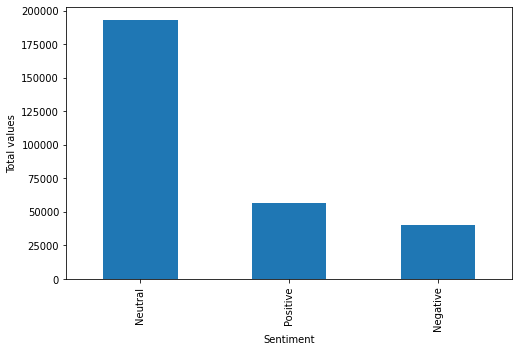

In [66]:
#Visualizing the number of Poitive,Negative and Neutral classes
plt.figure(figsize=(8,5))
plt.xlabel('Sentiment')
plt.ylabel('Total values')
news_df1['Sentiment'].value_counts().plot(kind='bar')

Numerical Data Analysis

In [20]:
import yfinance as yf

In [21]:
num_df=yf.download('^BSESN', start='2015-01-01', end='2022-01-30')

[*********************100%***********************]  1 of 1 completed


In [22]:
num_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [23]:
num_df.shape

(1740, 6)

In [24]:
num_df= num_df[['Close']]
num_df.head(5)

,Close
Date,
2015-01-02,27887.900391
2015-01-05,27842.320312
2015-01-06,26987.460938
2015-01-07,26908.820312
2015-01-08,27274.710938


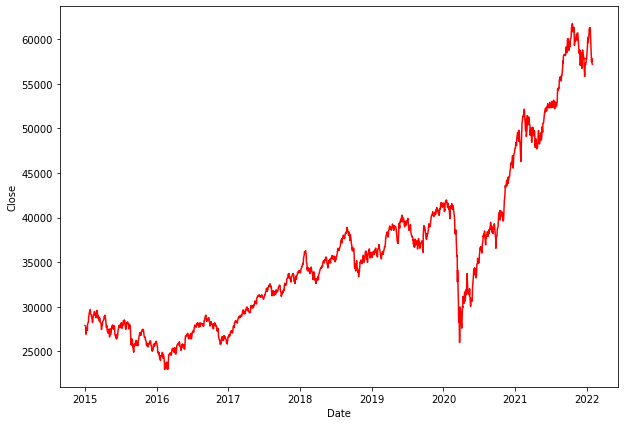

In [25]:
# Visualization
# plotting the closing price
index=num_df.index
plt.figure(figsize=(10,7))
sns.lineplot(x=index, y=num_df['Close'],color='red')

In [26]:
# Data preprocessing
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(num_df)


In [27]:
#Splitting the data 
train_size=0.80
len_train_data=round(len(num_df)*train_size)
training_data=scaled_data[0:len_train_data]
testing_data=scaled_data[len_train_data:]
print(f'The shape of training data is : {training_data.shape}')
print(f'The shape of testing data is : {testing_data.shape}')


The shape of training data is : (1392, 1)
The shape of testing data is : (348, 1)


In [28]:
#Creating features for future prediction
#We will use past 90 days data to predict the present
def feature_extraction(data,start,end):
  X_train=[]
  y_train=[]
  for i in range(start,end):
    X_train.append(data[i-50:i])
    y_train.append(data[i])
  return X_train,y_train

In [29]:
#Creating training data
X_train,y_train=feature_extraction(training_data,50,len(training_data))
#creating testing data
X_test,y_test=feature_extraction(testing_data,50,len(testing_data))

In [30]:
#Converting the list to numpy array
#Training data
X_train=np.array(X_train)
y_train=np.array(y_train)
#Testing data
X_test=np.array(X_test)
y_test=np.array(y_test)

In [31]:
print(X_test.shape), print(y_test.shape)


(298, 50, 1)
(298, 1)


(None, None)

In [32]:
print(X_train.shape), print(y_train.shape)

(1342, 50, 1)
(1342, 1)


(None, None)

In [33]:
#Creating X train DataFrame
#In order to get the original value we should inverse transform the scaled data
# We inverse transform here because we will later use it for visualization
train_df=pd.DataFrame(scaler.inverse_transform(X_train.reshape(-1,50)),index=np.arange(0,len(X_train)))
train_df['target']=scaler.inverse_transform(y_train)

In [34]:
#Creating X test DataFrame
test_df=pd.DataFrame(scaler.inverse_transform(X_test.reshape(-1,50)),index=np.arange(len(X_train),len(X_train)+len(X_test)))
test_df['target']=scaler.inverse_transform(y_test)

Building Model

In [36]:
import keras
import keras.utils
from keras import utils as np_utils

In [37]:

model=keras.Sequential()
model.add(keras.layers.LSTM(units=384,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(keras.layers.LSTM(units=384,return_sequences=True))
model.add(keras.layers.LSTM(units=384,return_sequences=True))
model.add(keras.layers.LSTM(units=384,return_sequences=False))
model.add(keras.layers.Dense(units=1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 384)           592896    
                                                                 
 lstm_1 (LSTM)               (None, 50, 384)           1181184   
                                                                 
 lstm_2 (LSTM)               (None, 50, 384)           1181184   
                                                                 
 lstm_3 (LSTM)               (None, 384)               1181184   
                                                                 
 dense (Dense)               (None, 1)                 385       
                                                                 
Total params: 4,136,833
Trainable params: 4,136,833
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',loss='mse')
callback_chk=keras.callbacks.ModelCheckpoint(filepath='best_model.h5',save_best_only=True)
model_history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[callback_chk])

Epoch 1/30
42/42 [==============================] - 82s 2s/step - loss: 0.0238 - val_loss: 0.1486
Epoch 2/30
42/42 [==============================] - 70s 2s/step - loss: 0.0048 - val_loss: 0.0766
Epoch 3/30
42/42 [==============================] - 68s 2s/step - loss: 0.0015 - val_loss: 0.0601
Epoch 4/30
42/42 [==============================] - 71s 2s/step - loss: 0.0012 - val_loss: 0.0445
Epoch 5/30
42/42 [==============================] - 69s 2s/step - loss: 8.9694e-04 - val_loss: 0.0596
Epoch 6/30
42/42 [==============================] - 66s 2s/step - loss: 7.4209e-04 - val_loss: 0.0520
Epoch 7/30
42/42 [==============================] - 68s 2s/step - loss: 6.3822e-04 - val_loss: 0.0263
Epoch 8/30
42/42 [==============================] - 70s 2s/step - loss: 5.9317e-04 - val_loss: 0.0295
Epoch 9/30
42/42 [==============================] - 68s 2s/step - loss: 5.1035e-04 - val_loss: 0.0305
Epoch 10/30
42/42 [==============================] - 68s 2s/step - loss: 5.0366e-04 - val_loss: 0.

In [39]:
model=keras.models.load_model('best_model.h5')

Making Predictions

In [40]:
#Making predictions with some data 
predictions=model.predict(X_test)

In [41]:
predictions.shape

(298, 1)

In [42]:
#Performing inverse transformation on predictions and actual value
predictions_inv=scaler.inverse_transform(predictions)
y_test_inv=scaler.inverse_transform(y_test)

In [43]:
#RMSE
rmse_error=np.sqrt(np.mean(pow((predictions_inv-y_test_inv),2)))
rmse_error

2324.310787221947

In [44]:
# R squared
from sklearn.metrics import r2_score
r2_score(y_test_inv,predictions_inv)

0.779112835785423

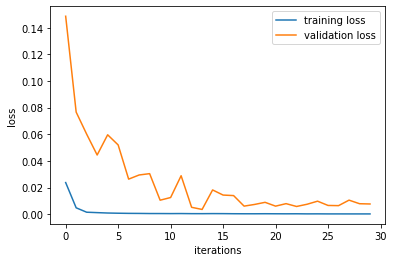

In [45]:
#Plotting the losses
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']
index=np.arange(30)
sns.lineplot(x=index,y=loss)
sns.lineplot(x=index,y=val_loss)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend(['training loss','validation loss'])

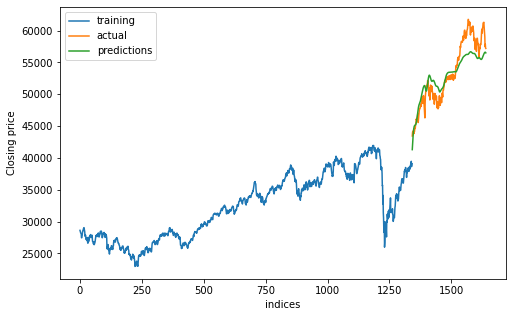

In [46]:
#Plotting the training data,testing data and predicted data
plt.figure(figsize=(8,5))
train_df['target'].plot()
test_df['target'].plot()
test_df['predictions']=predictions_inv
test_df['predictions'].plot()
plt.xlabel('indices')
plt.ylabel('Closing price')
plt.legend(['training','actual','predictions'])
plt.show()

- Blue line indicates the whole data set
- Green line indicates the predictions made for the next 50 days.
- Orange line indicates the actual prediction.

In [71]:
# Merging the stocks dataframe and the news dataframe on date column
df_final=pd.merge(news_df1,num_df,on="Date")

In [72]:
df_final

,headline_text,Date,polarity,subjectivity,Sentiment,Close
0,Mohali: Bajwa Developers managing director in ...,2020-08-07,0.000000,0.000000,Neutral,38040.570312
1,Couple moves HC to talk to grandchild,2020-08-07,0.000000,0.000000,Neutral,38040.570312
2,West Bengal CM warns against fake Covid tests,2020-08-07,-0.500000,1.000000,Negative,38040.570312
3,Elderly woman loses gold chain to snatchers,2020-08-07,-0.300000,0.100000,Negative,38040.570312
4,'Mission Zero Mortality' launched in Aurangabad,2020-08-07,0.000000,0.000000,Neutral,38040.570312
...,...,...,...,...,...,...
176746,State govt has failed to provide basics: Ferreira,2022-01-28,-0.500000,0.300000,Negative,57200.230469
176747,SC revoking suspension of 12 MLAs; slap on Mah...,2022-01-28,0.000000,0.000000,Neutral,57200.230469
176748,On Goa's lateritic plateaus; researchers disco...,2022-01-28,0.136364,0.454545,Positive,57200.230469
176749,In a first; BJP fields 12 Catholic candidates ...,2022-01-28,0.125000,0.216667,Positive,57200.230469


In [73]:
# Grouping
df_final.groupby('Sentiment')['Close'].mean()

Sentiment
Negative    50711.433883
Neutral     50731.109050
Positive    50688.785046
Name: Close, dtype: float64

In [74]:
#Creting dummy variables for sentiment column
df_final=pd.get_dummies(data=df_final,columns=['Sentiment'])

In [75]:
df_final.head(5)

,headline_text,Date,polarity,subjectivity,Close,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
0,Mohali: Bajwa Developers managing director in ...,2020-08-07,0.0,0.0,38040.570312,0,1,0
1,Couple moves HC to talk to grandchild,2020-08-07,0.0,0.0,38040.570312,0,1,0
2,West Bengal CM warns against fake Covid tests,2020-08-07,-0.5,1.0,38040.570312,1,0,0
3,Elderly woman loses gold chain to snatchers,2020-08-07,-0.3,0.1,38040.570312,1,0,0
4,'Mission Zero Mortality' launched in Aurangabad,2020-08-07,0.0,0.0,38040.570312,0,1,0


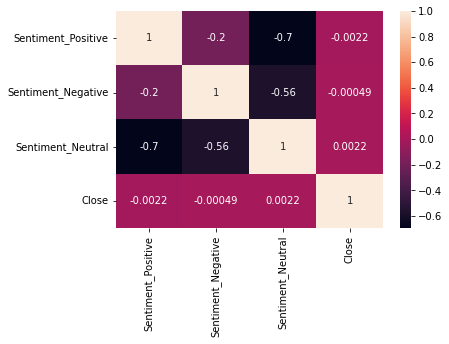

In [76]:
# Plotting Correlation  Matrix
corr_data=df_final[['Sentiment_Positive','Sentiment_Negative','Sentiment_Neutral','Close']].corr()
sns.heatmap(corr_data,annot=True)

Conclusion:

We can finally conclude that the stock price obtained from yahoo finance are showing that they are Negatively correlated with the Sentiment analysis of headline news.